In [802]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import islice
import csv

In [803]:
csv = "Data/Cleaned_Data.csv"

car_df = pd.read_csv(csv)

In [804]:
car_df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,New_Model
0,5490,2009,10,Bronx,NY,1N4AL21E59C175525,Nissan,Altima4dr,Altima
1,10588,2016,2790,Long Island City,NY,1N4AL3APXGN317893,Nissan,Altima2.5,Altima
2,6998,2013,32205,Inwood,NY,1N4AL3AP9DC251411,Nissan,AltimaSedan,Altima
3,8950,2017,7995,Phoenix,AZ,3N1AB7AP4HY244614,Nissan,SentraS,Sentra
4,9990,2016,24978,Raleigh,NC,1N4AL3AP2GC177284,Nissan,Altima2.5,Altima


In [809]:
model_df = car_df.sort_values(by="Year").drop(['Mileage'], axis=1)
model_df = model_df.groupby(["New_Model", "Year"]).mean()
model_df = pd.pivot_table(model_df, values="Price", index="Year", columns="New_Model")
model_df.head(30)

New_Model,370Z,Altima,Armada,GT-R,Maxima,Murano,NV,Pathfinder,Quest,Rogue,Sentra,Titan,Versa,Xterra
Year,,,,,,,,,,,,,,
1997,NaN,NaN,NaN,NaN,3701.000000,NaN,NaN,NaN,NaN,NaN,4995.000000,NaN,NaN,NaN
1998,NaN,2832.750000,NaN,NaN,2663.000000,NaN,NaN,4395.000000,2338.000000,NaN,2245.000000,NaN,NaN,NaN
1999,NaN,2632.000000,NaN,NaN,3232.166667,NaN,NaN,3512.166667,3697.000000,NaN,2895.000000,NaN,NaN,NaN
2000,NaN,2902.800000,NaN,NaN,3395.266667,NaN,NaN,4378.666667,2474.500000,NaN,3537.000000,NaN,NaN,3543.000000
2001,NaN,3626.615385,NaN,NaN,3289.000000,NaN,NaN,4055.600000,1986.666667,NaN,2868.500000,NaN,NaN,4269.058824
2002,NaN,4061.909091,NaN,NaN,10821.916667,NaN,NaN,4665.416667,2631.000000,NaN,3922.400000,NaN,NaN,5249.074074
2003,NaN,4368.318182,NaN,NaN,4187.666667,5694.153846,NaN,5475.062500,NaN,NaN,3661.916667,NaN,NaN,5901.103448
2004,NaN,4321.277778,NaN,NaN,5028.894737,6233.901961,NaN,7104.642857,5235.294118,NaN,3706.766667,9758.545455,NaN,5515.511628
2005,NaN,5053.228261,8371.882353,NaN,5738.875000,6445.863636,NaN,7737.016393,5907.357143,NaN,4572.147059,10158.059701,NaN,7223.750000


(2018.0, 1996.0)

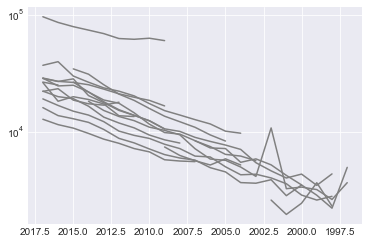

In [331]:
plt.style.use('seaborn-darkgrid')
fig,ax = plt.subplots()
ax.plot(range(2009,2018), model_df['370Z'][12:21], color="gray")
ax.plot(range(1998,2018), model_df['Altima'][1:21], color="gray")
ax.plot(range(2005,2018), model_df['Armada'][8:21], color="gray")
ax.plot(range(2009,2018), model_df['GT-R'][12:21], color="gray")
ax.plot(range(1997,2018), model_df['Maxima'], color="gray")
ax.plot(range(2003,2018), model_df['Murano'][6:21], color="gray")
ax.plot(range(2012,2018), model_df['NV'][15:21], color="gray")
ax.plot(range(1998,2018), model_df['Pathfinder'][1:21], color="gray")
ax.plot(range(1998,2018), model_df['Quest'][1:21], color="gray")
ax.plot(range(2008,2018), model_df['Rogue'][11:21], color="gray")
ax.plot(range(1997,2018), model_df['Sentra'], color="gray")
ax.plot(range(2004,2018), model_df['Titan'][7:21], color="gray")
ax.plot(range(2007,2018), model_df['Versa'][10:21], color="gray")
ax.plot(range(2000,2018), model_df['Xterra'][3:21], color="gray")
ax.set_yscale('log')
ax.set_xlim(ax.get_xlim()[::-1])

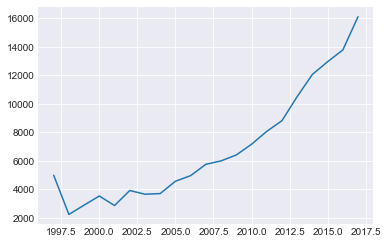

In [332]:
fig,ax = plt.subplots()
x=pd.Series(model_df['Sentra'])
idx=x.first_valid_index()
ldx=x.last_valid_index()
ldx2=x.last_valid_index()+1
ax.plot(range(idx, ldx2), x.loc[idx:ldx,])

(2018.0, 1996.0)

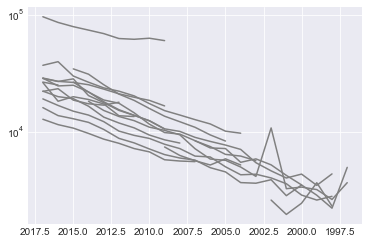

In [697]:
fig,ax = plt.subplots()
columns = list(model_df)
for i in columns:
    x=pd.Series(model_df[i], dtype=float)
    idx=x.first_valid_index()
    ldx=x.last_valid_index()
    ldx2=x.last_valid_index()+1
    ax.plot(range(idx, ldx2), x.loc[idx:ldx,], color="gray")
ax.set_yscale('log')
ax.set_xlim(ax.get_xlim()[::-1])

In [328]:
model_df2 = []
for i in columns:
    x=pd.Series(model_df[i], dtype=float)
    idx=x.first_valid_index()
    ldx=x.last_valid_index()
    ldx2=x.last_valid_index()+1
    model_df2[1,i] = x.loc[idx,]
    model_df2[2,i] = x.loc[ldx,]

TypeError: list indices must be integers or slices, not tuple

In [481]:
model_names = {'Model': list(columns)}
model_df2 = pd.DataFrame(model_names)
firstyear = []
firstvalue = []
lastyear = []
lastvalue = []
leng = []
percentdelta = []
for i in columns:
    x = pd.Series(model_df[i], dtype=float)
    idx = x.first_valid_index()
    idx_value = x.loc[idx,]
    ldx = x.last_valid_index()
    ldx_value = x.loc[ldx,]
    delta = (ldx_value - idx_value) / idx_value
    length = ldx - idx
    perdelta = (delta/length)*100
    firstyear.append(idx)
    firstvalue.append(idx_value)
    lastyear.append(ldx)
    lastvalue.append(ldx)
    leng.append(length)
    percentdelta.append(perdelta)
model_df2["First Year"] = firstyear
model_df2["Last Year"] = lastyear
model_df2["Per Change"] = percentdelta
print(model_df2.sort_values(by="Per Change"))

         Model  First Year  Last Year  Per Change
6           NV        2012       2017    4.743120
3         GT-R        2009       2017    7.457895
0         370Z        2009       2017    9.086383
10      Sentra        1997       2017   11.132827
12       Versa        2007       2017   12.952254
9        Rogue        2008       2017   19.620729
11       Titan        2004       2017   21.427069
5       Murano        2003       2017   28.671165
7   Pathfinder        1998       2017   29.127325
1       Altima        1998       2017   30.266023
4       Maxima        1997       2017   30.913661
2       Armada        2005       2017   33.347355
13      Xterra        2000       2015   43.369102
8        Quest        1998       2017   54.056148


In [482]:
model_df2 = model_df.astype(float).pct_change()
print(model_df)

New_Model     370Z   Altima   Armada     GT-R   Maxima   Murano       NV  \
Year                                                                       
1997           NaN      NaN      NaN      NaN     3701      NaN      NaN   
1998           NaN  2832.75      NaN      NaN     2663      NaN      NaN   
1999           NaN     2632      NaN      NaN  3232.17      NaN      NaN   
2000           NaN   2902.8      NaN      NaN  3395.27      NaN      NaN   
2001           NaN  3626.62      NaN      NaN     3289      NaN      NaN   
2002           NaN  4061.91      NaN      NaN  10821.9      NaN      NaN   
2003           NaN  4368.32      NaN      NaN  4187.67  5694.15      NaN   
2004           NaN  4321.28      NaN      NaN  5028.89   6233.9      NaN   
2005           NaN  5053.23  8371.88      NaN  5738.88  6445.86      NaN   
2006           NaN  6124.53  9436.97      NaN  5880.28  7511.91      NaN   
2007           NaN  6231.79  10961.2      NaN   7202.2  8406.19      NaN   
2008        

In [796]:
chang = []
result = []
big_df = pd.DataFrame(index=model_df.index)
x = pd.DataFrame(model_df['Xterra'])
ldx = x.last_valid_index()
ldx_value = x.loc[ldx,]
for row in x.itertuples():
    chang = float(row[1]) / ldx_value[0]
    result.append(chang)
big_df['Xterra'] = result
print(big_df)

KeyError: 'Xterra'

In [810]:
big_df = pd.DataFrame(index=model_df.index)
for i in columns:
    new_df = []
    result = []
    chang = []
    x = pd.DataFrame(model_df[i])
    idx = x.first_valid_index()
    idx_value = x.loc[idx,]
    ldx = x.last_valid_index()
    ldx_value = x.loc[ldx,]
    for row in x.itertuples():
        chang = float(row[1]) / float(ldx_value[0])
        result.append(chang)
    new_df = pd.DataFrame(result)
    new_df.index = model_df.index.copy()
    big_df = big_df.merge(new_df, left_index=True, right_index=True)
print(big_df)

           0_x       0_y       0_x       0_y       0_x       0_y       0_x  \
Year                                                                         
1997       NaN       NaN       NaN       NaN  0.139223       NaN       NaN   
1998       NaN  0.148136       NaN       NaN  0.100176       NaN       NaN   
1999       NaN  0.137638       NaN       NaN  0.121586       NaN       NaN   
2000       NaN  0.151799       NaN       NaN  0.127722       NaN       NaN   
2001       NaN  0.189651       NaN       NaN  0.123724       NaN       NaN   
2002       NaN  0.212414       NaN       NaN  0.407095       NaN       NaN   
2003       NaN  0.228437       NaN       NaN  0.157530  0.199443       NaN   
2004       NaN  0.225977       NaN       NaN  0.189175  0.218348       NaN   
2005       NaN  0.264254  0.199933       NaN  0.215883  0.225772       NaN   
2006       NaN  0.320277  0.225368       NaN  0.221202  0.263112       NaN   
2007       NaN  0.325886  0.261768       NaN  0.270929  0.294435